$$\newcommand{\ket}[1]{|#1\rangle}$$
$$\newcommand{\bra}[1]{\langle#1|}$$
### **Three-Qubit Gates**
#### For three qubits, the possible outcomes on measurement are -
$$\ket{000} , \ket{001} , \ket{010} , \ket{011} , \ket{100} , \ket{110} , \ket{101} , \ket{111}$$ 
<br>

<center><b>We know </b></center>
$$\ket{abc}=\ket{a}\otimes\ket{b}\otimes\ket{c} $$

<left><b>For eg$\to$<b><left>   
$$ \ket{000}=\ket{0}\otimes\ket{0}\otimes\ket{0} $$
<br>

$$\ket{000}=\begin{bmatrix}1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0\end{bmatrix} $$
####     
 
<br>


<left><b>Trick<b><left>
$$\ket{\psi}=\begin{bmatrix}Amplitude\,of \ket{000} \\ Amplitude\,of \ket{001} \\ Amplitude\,of \ket{010} \\ Amplitude\,of \ket{011} \\ Amplitude\,of \ket{100} \\ Amplitude\,of \ket{101} \\ Amplitude\,of \ket{110} \\ Amplitude\,of \ket{111}\end{bmatrix} $$
<br>
<center><b> Statevector of $\ket{\psi}$= $\ket{abc}$ could be obtained by replacing $\ket{abc}$ with 1 in the above column vector and all other elements as 0<b><left> 

In [1]:
# importing dependencies
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile , assemble
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import average_gate_fidelity, process_fidelity, Operator
from qiskit import BasicAer
from qiskit import Aer, execute, visualization
import matplotlib.pyplot as plt
import numpy as np
from math import pi,sqrt
from qiskit.visualization import array_to_latex

## **1)Toffoli gate (ccx gate)**
##### **It is also known as double controlled-NOT gate .**
##### **It has two control qubits and one target. It applies a NOT to the target only when both controls are in |1> state .** 

| Control qubits | Target Qubit |
| :-: | :-: |
| $\ket{00}$ | $\ket{0}$ |
| $\ket{01}$ | $\ket{0}$ |
| $\ket{10}$ | $\ket{0}$ |
| $\ket{11}$ | $\ket{1}$ |

<center>target qubit is initialised at 0</center>

#### From the Truth Table it is clear that Toffoli gate behaves like AND Gate, and on applying X gate on the output state as NAND gate
<br>
<center><b>$$\ket{abc} \to \ket{a}  \otimes \ket{b} \otimes \ket{c}$$<b><center>
<br>
<center><b>$$C_{cx}=\begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 & 0 & 0 & 0 & 0\end{bmatrix} $$<b><center>

In [2]:
def toffoli(q1, q0):
    qc = QuantumCircuit(3)
    if q1:
        qc.x(1)
    if q0:
        qc.x(0)  
    #qc.ccx(contol qubit 1, control qubit 2 , target qubit)       
    qc.ccx(0,1,2)  
    display(qc.draw('mpl'))
    
    # executing the circuit
    backend = BasicAer.get_backend('statevector_simulator')
    job1 = execute(qc, backend)
    result1 = job1.result()

    # probability of output state
    counts = result1.get_counts(qc)
    print(counts)
    
    global gate1
    gate1 = Operator(qc)
    

#### Example 1: When both control qubits are $\ket{0}$ , there is no change in target qubit's state

q2 or the first qubit on the left in the qubit string is the target qubit

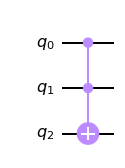

{'000': 1.0}


In [3]:
toffoli(0,0)
gate_1 = gate1

#### Example 2: When one of the control qubits is $\ket{1}$ , there's no change in target qubit's state

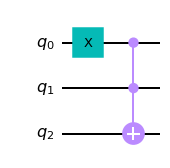

{'001': 1.0}


In [4]:
toffoli(0,1)

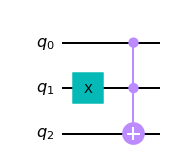

{'010': 1.0}


In [5]:
toffoli(1,0)

#### Example 3: When both control qubits are $\ket{1}$ , target qubits get flipped by the application of NOT gate

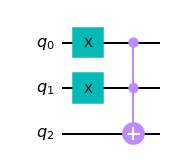

{'111': 1.0}


In [6]:
toffoli(1,1)

### Toffoli decomposed to H, T and CNOT gates (universal gates)

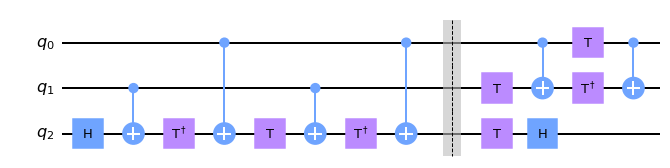

In [7]:
qc = QuantumCircuit(3)
qc.h(2)

qc.cx(1,2)

qc.tdg(2)

qc.cx(0,2)

qc.t(2)

qc.cx(1,2)

qc.tdg(2)

qc.cx(0,2)

qc.barrier()
qc.t([1,2])

qc.cx(0,1)
qc.h(2)

qc.t(0)
qc.tdg(1)

qc.cx(0,1)

qc.draw('mpl')

In [8]:
gate2 = Operator(qc)
print('Average Gate Fidelity: {}'.format(average_gate_fidelity(gate_1, gate2)))
print('Process Fidelity: {}'.format(process_fidelity(gate_1, gate2)))

Average Gate Fidelity: 0.9999999999999992
Process Fidelity: 0.9999999999999991


## **2) Controlled swap gate (Fredkin Gate or Cswap gate)**
<br>
<center><b>It exchanges the second and third qubits if the first qubit (LSB) is $\ket{1}$ :</b></center>
<br>
$$
\ket{abc}\, \to \left\{
    \begin{array}\\
        \ket{bac} & \mbox{if } c=1 \\
        \ket{abc} & \mbox{if } c= 0 
    \end{array}
\right.
$$
<br>
<center><b>q$_{0}$ is the control qubit and q$_{1}$ and q$_{2}$ are the target qubits</b></center>
<br>
    $$
\ket{q_{2}q_{1}q_{0}} \,\to \left\{
    \begin{array}\\
        \ket{q_{1}q_{2}q_{0}} & \mbox{if } q_0=1 \\
        \ket{q_{2}q_{1}q_{0}} & \mbox{if } q_0= 0 
    \end{array}
\right.
$$

| Initial State | Control qubit | Target Qubits | Output State |
| :-: | :-: | :-: | :-: |
| $\ket{000}$ | $\ket{0}$ | $\ket{00}$ | $\ket{000}$ |
| $\ket{001}$ | $\ket{0}$ | $\ket{01}$ | $\ket{001}$ |
| $\ket{010}$ | $\ket{0}$ | $\ket{10}$ | $\ket{010}$ |
| $\ket{011}$ | $\ket{0}$ | $\ket{11}$ | $\ket{011}$ |
| $\ket{100}$ | $\ket{1}$ | $\ket{00}$ | $\ket{100}$ |
| $\ket{101}$ | $\ket{1}$ | $\ket{01}$ | $\ket{110}$ |
| $\ket{110}$ | $\ket{1}$ | $\ket{10}$ | $\ket{101}$ |
| $\ket{111}$ | $\ket{1}$ | $\ket{11}$ | $\ket{111}$ |

$$where\,initial\,state\, is\,\ket{q_0 q_1 q_2}$$
<br>
<center><b>$$C_{Swap}=\begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 1\end{bmatrix} $$</b></center>
<br>


##### Note: Cswap Gate matrix is specific to the qubit selected as control qubit. The matrix won't be same as above when q1 or q2 is control qubit

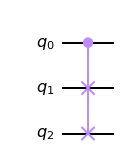

In [9]:
qc = QuantumCircuit(3)
#cswap( control qubit , target qubit 1 , target qubit 2)
qc.cswap(0,1,2)    
display(qc.draw('mpl'))

# executing the circuit
backend = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

gate_1 = Operator(qc)

In [10]:
def cswap_math(q2,q1,q0):
    qc = QuantumCircuit(3)
    #cswap( control qubit , target qubit 1 , target qubit 2)
    qc.cswap(0,1,2)    
    display(qc.draw('mpl'))

    # executing the circuit
    backend = BasicAer.get_backend('unitary_simulator')
    job = execute(qc, backend)
    result = job.result()

    cswap_gate = backend.run(transpile(qc, backend)).result().get_unitary(qc, decimals=3)
    print('Example:\n')
    print("|{}{}{}>\n".format(q2,q1,q0)) 
    # control bit is q0
    # If it is 1, q1 and q2 swap
    initial_state = np.matrix([[0],[0],[0],[0],[0],[0],[0],[0]])
    index = q2*(2**2) + q1*(2**1) + q0*(2**0)
    initial_state[index][0] = 1
    display(visualization.array_to_latex(initial_state))
    
    output = cswap_gate*initial_state
    index = np.where(output == 1)
    output_ket = bin(index[0][0])[2:].zfill(3)
    print("Applying Cswap Gate gate on |{}{}{}> gives |{}>, that is:\n".format(q2,q1,q0, output_ket))
    display(visualization.array_to_latex(output))

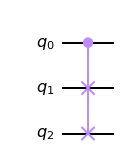

Example:

|101>



<IPython.core.display.Latex object>

Applying Cswap Gate gate on |101> gives |011>, that is:



<IPython.core.display.Latex object>

In [11]:
cswap_math(1,0,1)

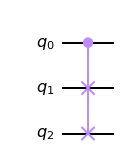

Example:

|001>



<IPython.core.display.Latex object>

Applying Cswap Gate gate on |001> gives |001>, that is:



<IPython.core.display.Latex object>

In [12]:
cswap_math(0,0,1)

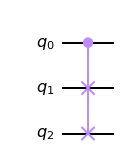

Example:

|100>



<IPython.core.display.Latex object>

Applying Cswap Gate gate on |100> gives |100>, that is:



<IPython.core.display.Latex object>

In [13]:
cswap_math(1,0,0)

### Fredkin decomposed to H, T and CNOT gates (universal gates)

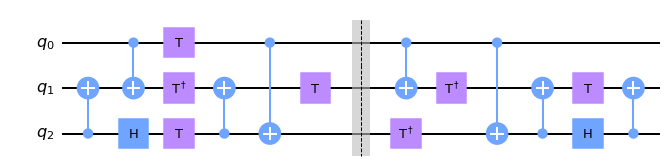

In [14]:
qc = QuantumCircuit(3)
qc.cx(2,1)

qc.cx(0,1)
qc.h(2)

qc.t(0)
qc.tdg(1)
qc.t(2)

qc.cx(2,1)
qc.cx(0,2)

qc.t(1)

qc.barrier()
qc.cx(0,1)
qc.tdg(2)

qc.tdg(1)

qc.cx(0,2)
qc.cx(2, 1)

qc.t(1)
qc.h(2)

qc.cx(2,1)

gate2 = Operator(qc)
qc.draw('mpl')

In [15]:
print('Average Gate Fidelity: {}'.format(average_gate_fidelity(gate_1, gate2)))
print('Process Fidelity: {}'.format(process_fidelity(gate_1, gate2)))

Average Gate Fidelity: 0.9999999999999992
Process Fidelity: 0.9999999999999991
